# CNN attempts by group 3

In [23]:
# import pandas as pd
# import torch
# import torchvision
# from torch import nn, optim
# from torch.utils.data import DataLoader, random_split
# from torchvision import transforms
# from torchvision.datasets import ImageFolder
# from torchvision.utils import make_grid
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

## Loading CIFAR 10 data set & preprocessing data

In [24]:
import numpy as np

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [25]:
#encoding labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [26]:
 #Normalize data

x_train = x_train / 255
x_test = x_test / 255

### Visualization

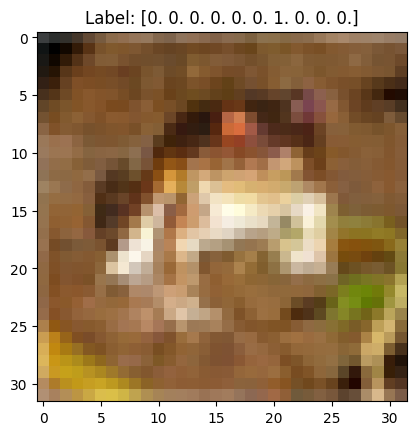

In [27]:
# Display the first image
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0]}")
plt.show()

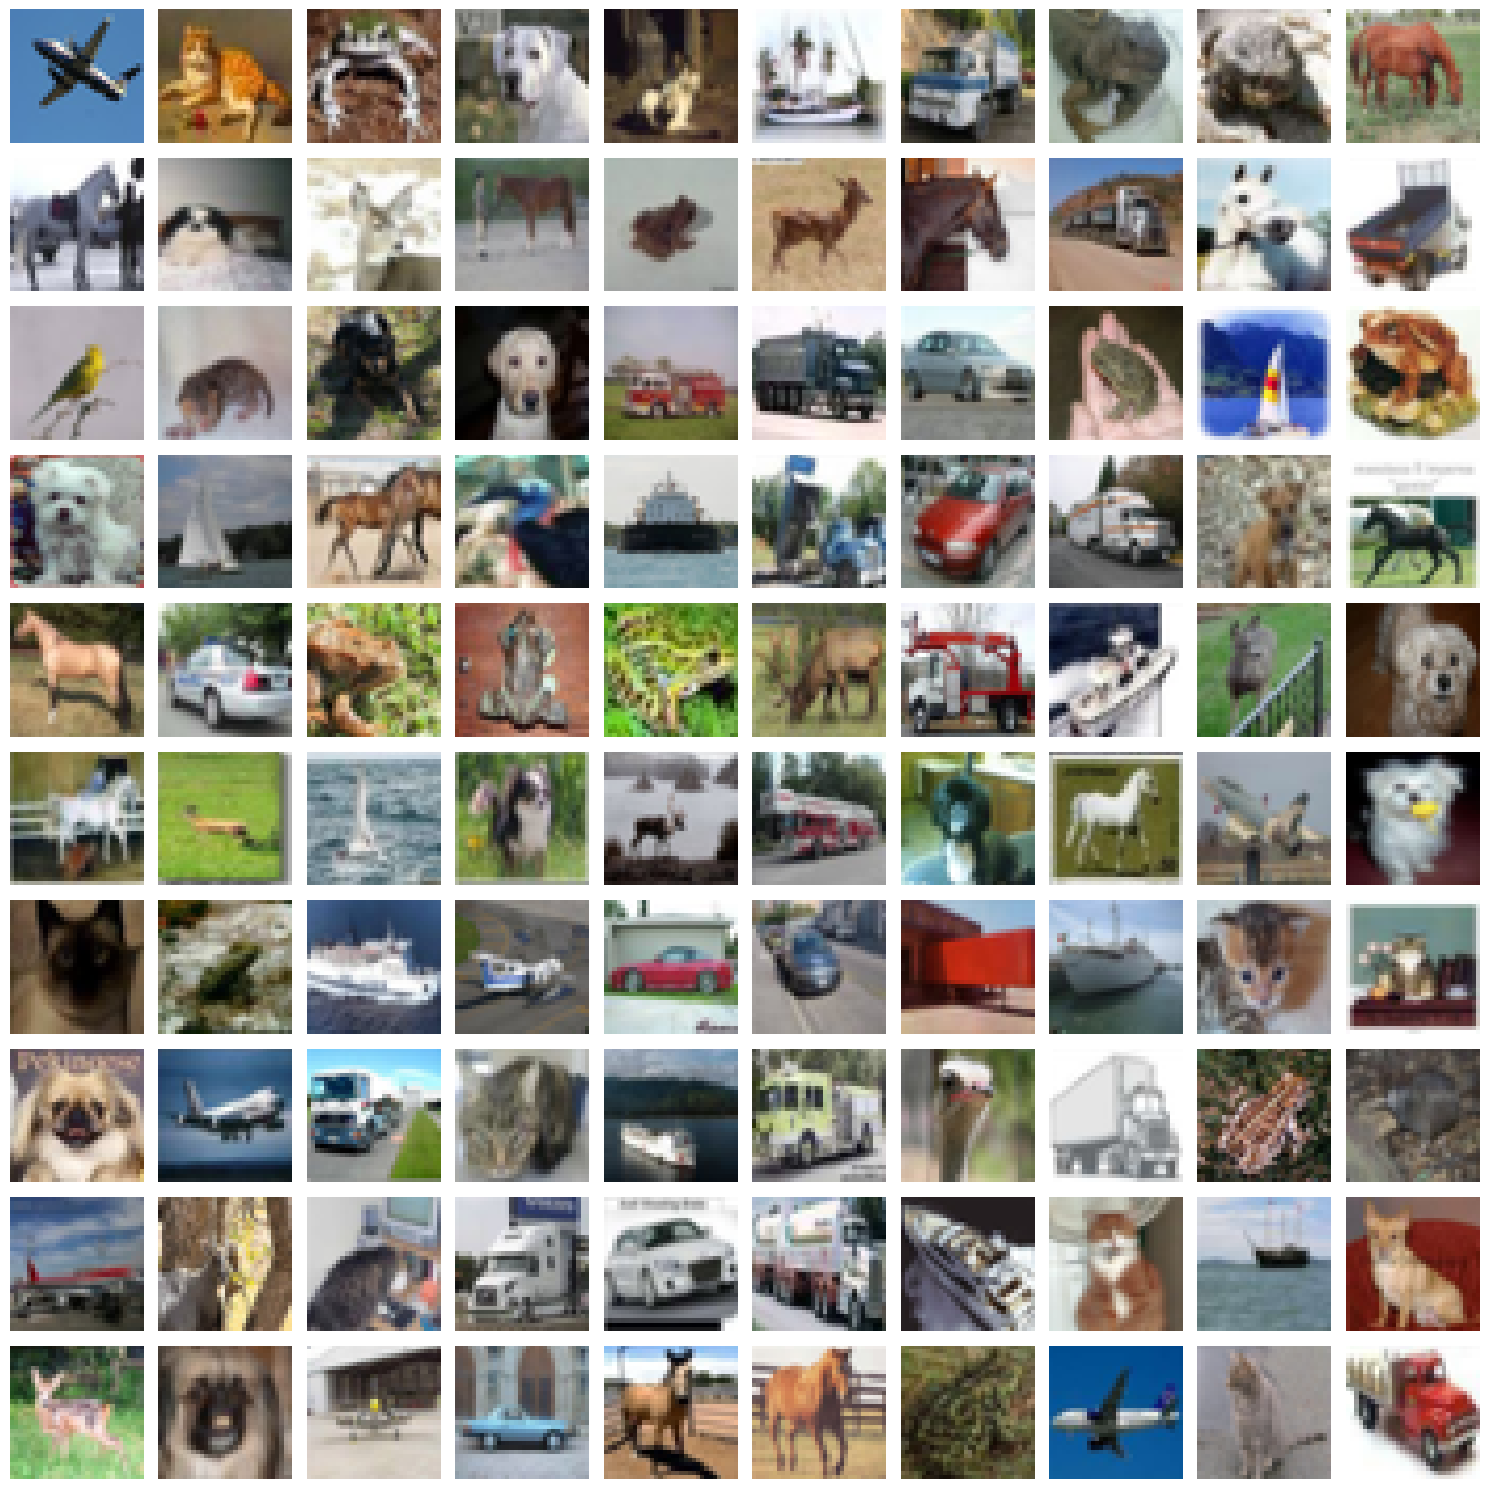

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 10x10 grid
plt.figure(figsize=(15, 15))  # Set the figure size for better visibility

# Randomly select 100 indices
random_indices = np.random.choice(len(x_train), 100, replace=False)

for i, idx in enumerate(random_indices):
    plt.subplot(10, 10, i + 1)  # Create a 10x10 grid
    plt.imshow(x_train[idx], cmap=plt.get_cmap('gray'))  # Display a random image
    plt.axis('off')  # Turn off axes for cleaner visualization

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

In [29]:
# Scaling up the images to 64 x 64:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import resize
import tensorflow as tf

# Resize x_train and x_test
x_train_resized = tf.image.resize(x_train, (64, 64), method=tf.image.ResizeMethod.BICUBIC)
x_test_resized = tf.image.resize(x_test, (64, 64), method=tf.image.ResizeMethod.BICUBIC)
y_train_resized = y_train
y_test_resized = y_test

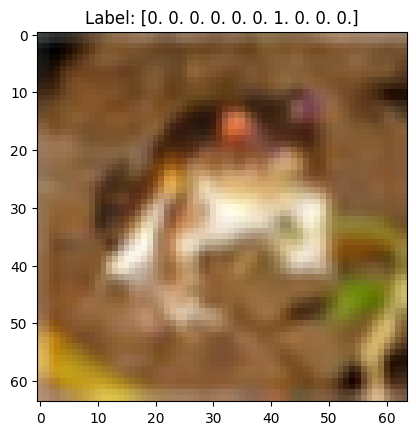

In [30]:
# Display the first image 64 x 64
import matplotlib.pyplot as plt
plt.imshow(x_train_resized[0])
plt.title(f"Label: {y_train_resized[0]}")
plt.show()

In [31]:
# Advanced Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_p = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen_p.fit(x_train_resized)
train_generator = datagen_p.flow(x_train_resized, y_train, batch_size=32)

## Model by Aurele

In [32]:
from keras.backend import clear_session
clear_session()

### Arcitecture Aurele's model:

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model_a = Sequential([
    # Block 1
    Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    # Fully connected layers
    Flatten(),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")  # 10 classes
])

model_a.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,106 (1.04 MB)

 Trainable params: 271,658 (1.04 MB)

 Non-trainable params: 448 (1.75 KB)

In [34]:
# Compile Model Aurele and train

model_a.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Train on cifar-10
batch_size = 512
epochs = 70

# Train the model and store the history
history_a = model_a.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/70
88/88 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.1146 - loss: 2.6281 - val_accuracy: 0.1064 - val_loss: 10.2080
Epoch 2/70
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2152 - loss: 2.1242 - val_accuracy: 0.1064 - val_loss: 10.8838
Epoch 3/70
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2644 - loss: 1.8868 - val_accuracy: 0.1378 - val_loss: 7.8101
Epoch 4/70
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3279 - loss: 1.7380 - val_accuracy: 0.1908 - val_loss: 5.9021
Epoch 5/70
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3785 - loss: 1.6178 - val_accuracy: 0.2546 - val_loss: 2.7699
Epoch 6/70
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4383 - loss: 1.4952 - val_accuracy: 0.4422 - val_loss: 1.7088
Epoch 7/70
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4919 - loss: 1.3849 - val_accuracy: 0.5728 - val_loss: 1.2482
Epoch 8/70
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5201 - loss: 1.3052 - val_accuracy: 0.6238 

## Choosen Group Model

### Architecture of the model

In [35]:
from keras.backend import clear_session
clear_session()

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D


# Define input shape for the VGG-like architecture
input_shape_value3 = (64, 64, 3)  # Input as per VGG guidelines
num_classes = 10  # Number of classes for classification

model_p = keras.Sequential()

# Block 1
model_p.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape_value3))
model_p.add(BatchNormalization())
model_p.add(Dropout(0.2))
model_p.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model_p.add(BatchNormalization())
model_p.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model_p.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_p.add(BatchNormalization())
model_p.add(Dropout(0.5))

# Block 3
model_p.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_p.add(BatchNormalization())
model_p.add(MaxPooling2D(pool_size=(2, 2)))
model_p.add(Dropout(0.5))

# Block 4
model_p.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_p.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_p.add(Dropout(0.5))  # Higher dropout for even deeper layers


# Replace Flatten with GAP
model_p.add(GlobalAveragePooling2D())  # GAP for dimensionality reduction
model_p.add(Dense(128, activation='relu'))
model_p.add(Dropout(0.5))
model_p.add(Dense(num_classes, activation='softmax'))  # Output layer

model_p.summary()  # Print the architecture summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │              

 Total params: 416,490 (1.59 MB)

 Trainable params: 415,978 (1.59 MB)

 Non-trainable params: 512 (2.00 KB)

In [36]:
# compile and train Paul's model

batch_size_value = 512
epochs_value = 150

# Advanced Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train_resized)
train_generator = datagen.flow(x_train_resized, y_train, batch_size=32)


from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Stop when accuracy stops improving
    patience=10,              # Allow 5 epochs without improvement
    restore_best_weights=True
)
from keras.callbacks import ReduceLROnPlateau

# Learning Rate Scheduler
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',     # Monitor validation loss
    factor=0.5,             # Reduce learning rate by half
    patience=5,             # Wait 3 epochs before reducing the rate
    min_lr=1e-7             # Set a minimum learning rate
)

# optimizing class cats // we took off because of time issues
#from sklearn.utils.class_weight import compute_class_weight

#class_weights = compute_class_weight(
#    "balanced", classes=np.unique(y_train.argmax(axis=1)), y=y_train.argmax(axis=1)
#)
# class_weights_dict[cat_class_index] *= 0.8  # Decrease the weight for "cat"
#class_weights_dict = dict(enumerate(class_weights))
#print("Final Class Weights:", class_weights_dict)

optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001)

# Compile and Train Model with Scheduler
model_p.compile(
    optimizer=optimizer,  # Initial LR
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_p = model_p.fit(
    train_generator,
    epochs= epochs_value,  # Use higher max epochs, but early stopping and scheduler will manage it
    batch_size=batch_size_value,
    validation_data=(x_test_resized, y_test),
    callbacks=[reduce_lr, early_stopping],
    # class_weight=class_weights_dict
)

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 45ms/step - accuracy: 0.2597 - loss: 1.9595 - val_accuracy: 0.3589 - val_loss: 1.7405 - learning_rate: 0.0010
Epoch 2/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.4633 - loss: 1.4809 - val_accuracy: 0.5416 - val_loss: 1.2526 - learning_rate: 0.0010
Epoch 3/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.5258 - loss: 1.3327 - val_accuracy: 0.5630 - val_loss: 1.2394 - learning_rate: 0.0010
Epoch 4/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.5630 - loss: 1.2331 - val_accuracy: 0.5940 - val_loss: 1.1232 - learning_rate: 0.0010
Epoch 5/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.5935 - loss: 1.1530 - val_accuracy: 0.6471 - val_loss: 0.9874 - learning_rate: 0.0010
Epoch 6/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6164 - loss: 1.0979 - val_accuracy: 0.6590 - val_loss: 0.9665 - learning_rate: 0.0010
Epoch 7/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0

### Training Evaulation

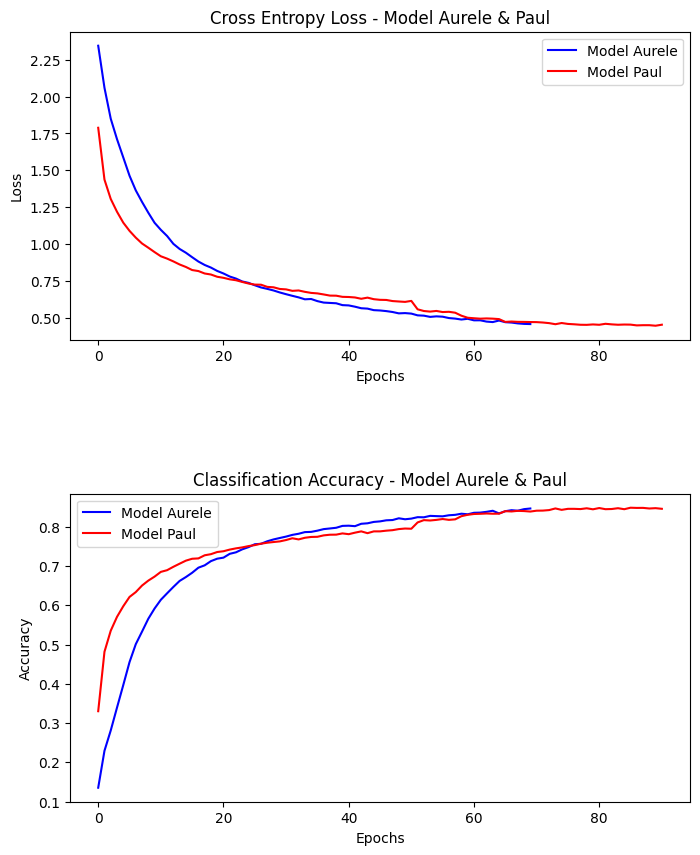

Model Aurele Architecture:
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Test loss: 0.5703050494194031
Test accuracy: 0.8220000267028809 

G3 Model Architecture:
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])
Test loss: 0.3564315438270569
Test accuracy: 0.8823000192642212


In [44]:
# Visualisation Cross Entropy Loss and Accuracy

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 10))  # Set figure size for better clarity

# First subplot for loss
plt.subplot(211)
plt.title('Cross Entropy Loss - Model Aurele & Paul')
plt.plot(history_a.history['loss'], color='blue', label='Model Aurele')
# plt.plot(history_e.history['loss'], color='green', label='Model Enrique')
plt.plot(history_p.history['loss'], color='red', label='Model Paul')
plt.xlabel('Epochs')  # Add x-label for consistency
plt.ylabel('Loss')    # Add y-label
plt.legend()

# Second subplot for accuracy
plt.subplot(212)
plt.title('Classification Accuracy - Model Aurele & Paul')
plt.plot(history_a.history['accuracy'], color='blue', label='Model Aurele')
# plt.plot(history_e.history['accuracy'], color='green', label='Model Enrique')
plt.plot(history_p.history['accuracy'], color='red', label='Model Paul')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust spacing between plots to prevent overlap
plt.subplots_adjust(hspace=0.5)

plt.show()

# Print results for all models
print("\033[1mModel Aurele Architecture:\033[0m")
print(history_a.history.keys())
score = model_a.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1], '\n')

# print("\033[1mModel #2 Architecture:\033[0m")
# print(history_e.history.keys())
# score2 = model_e.evaluate(x_test_resized, y_test, verbose=0)
# print("Test loss:", score2[0])
# print("Test accuracy:", score2[1], '\n')

print("\033[1mG3 Model Architecture:\033[0m")
print(history_p.history.keys())
score3 = model_p.evaluate(x_test_resized, y_test, verbose=0)
print("Test loss:", score3[0])
print("Test accuracy:", score3[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


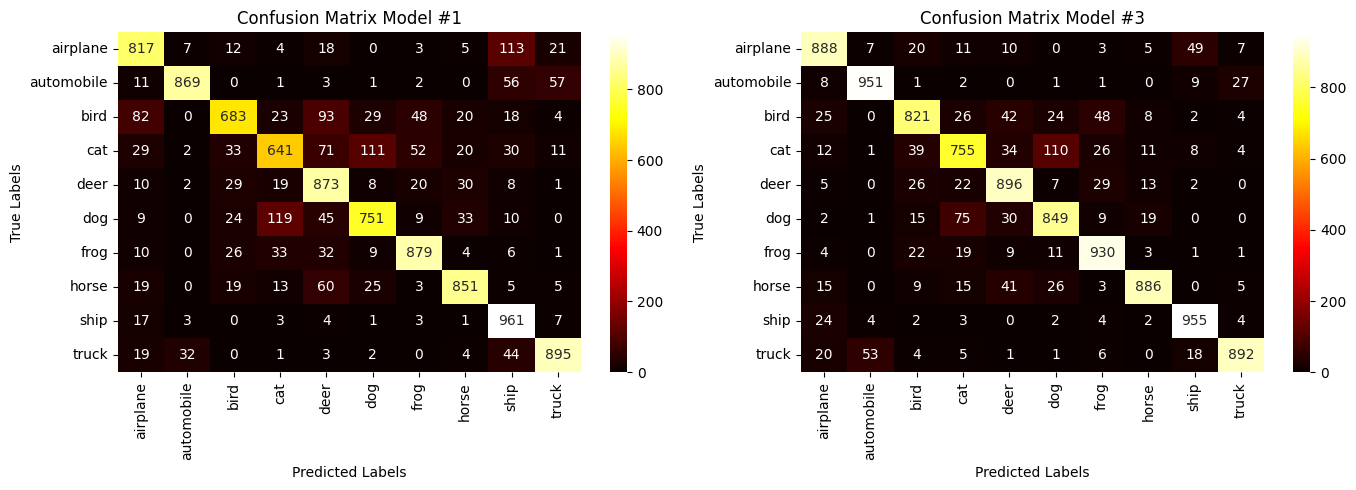

In [38]:
# Comparison by Confiusion matrix

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Predictions and ground truth for Model #1
predictions_a = model_a.predict(x_test)
predictions_a = np.argmax(predictions_a, axis=1)
gt_a = np.argmax(y_test, axis=1)
cm_a = confusion_matrix(gt_a, predictions_a)

# Resize x_test to match the input size for Model #3
x_test_resized = tf.image.resize(x_test, (64, 64), method=tf.image.ResizeMethod.BICUBIC)  # Assuming Model #3 was trained on 64x64 images

# Predictions and ground truth for Model #3
predictions_p = model_p.predict(x_test_resized)  # Use resized images for Model #3
predictions_p = np.argmax(predictions_p, axis=1)
gt_p = np.argmax(y_test, axis=1)
cm_p = confusion_matrix(gt_p, predictions_p)

# Create subplots for 2 models
fig, axs = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Confusion matrix for Model #1
sns.heatmap(cm_a, annot=True, fmt='d', cmap='hot', xticklabels=class_names, yticklabels=class_names, ax=axs[0])
axs[0].set_title('Confusion Matrix Model #1')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')

# Confusion matrix for Model #3
sns.heatmap(cm_p, annot=True, fmt='d', cmap='hot', xticklabels=class_names, yticklabels=class_names, ax=axs[1])
axs[1].set_title('Confusion Matrix Model #3')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [43]:
# Comparison by Precision & Recall & F1-Score

import pandas as pd  # Import pandas with the alias 'pd'
from sklearn.metrics import precision_recall_fscore_support # Import the function
import numpy as np # Import numpy for argmax


# Assuming y_test is one-hot encoded, convert it to multiclass format
y_test_multiclass = np.argmax(y_test, axis=1)

metrics = precision_recall_fscore_support(y_test_multiclass, predictions_p, average=None)
report_df_p = pd.DataFrame({
    'Class': class_names,
    'Precision': metrics[0],
    'Recall': metrics[1],
    'F1-Score': metrics[2],
    'Support': metrics[3]
})

print(f"G3 Model result: \n { report_df_p} \n")

G3 Model result: 
         Class  Precision  Recall  F1-Score  Support
0    airplane   0.885344   0.888  0.886670     1000
1  automobile   0.935103   0.951  0.942985     1000
2        bird   0.856100   0.821  0.838183     1000
3         cat   0.809218   0.755  0.781169     1000
4        deer   0.842897   0.896  0.868638     1000
5         dog   0.823472   0.849  0.836041     1000
6        frog   0.878187   0.930  0.903351     1000
7       horse   0.935586   0.886  0.910118     1000
8        ship   0.914751   0.955  0.934442     1000
9       truck   0.944915   0.892  0.917695     1000 

